## Import Libraries

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.datasets import make_classification, make_circles
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn import svm

## Import Datasets

In [2]:
seeds_train = pd.read_csv("Dataset/seeds_train.csv", header= None)
seeds_test = pd.read_csv("Dataset/seeds_test.csv", header= None)

# Data Information

In [3]:
seeds_train.head()

,0,1,2
0,14.84,2.221,1
1,14.09,2.699,1
2,13.94,2.259,1
3,14.99,1.355,1
4,14.49,3.586,1


In [4]:
seeds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       169 non-null    float64
 1   1       169 non-null    float64
 2   2       169 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.1 KB


In [21]:
seeds_train.describe()

,0,1,2
count,169.000000,169.000000,169.000000
mean,14.500592,3.702427,2.000000
std,1.304375,1.520625,0.830949
min,12.570000,0.765100,1.000000
25%,13.410000,2.587000,1.000000
50%,14.180000,3.597000,2.000000
75%,15.380000,4.825000,3.000000
max,17.250000,8.456000,3.000000


In [22]:
seeds_train.count()

0    169
1    169
2    169
dtype: int64

In [23]:
seeds_train[2].value_counts()

3    58
1    58
2    53
Name: 2, dtype: int64

### Method to get model accuracy

In [24]:
# method to get accuracy of the model
def getAccuracy(model, x, y):
    return model.score(x,y)*100

# Plot Data

In [25]:
def prepareDataset(X_train, y_train, cls_remove=None):
   cls = [1, 2, 3]
   if cls_remove is not None:
     features = []
     labels = []
     for index, (feat, label) in enumerate(zip(X_train, y_train)):
       if y[index] != cls_remove:
         features.append(feat)
         labels.append(label)
     cls.pop(cls_remove)
   else:
     features = X_train
     labels = y_train
   return np.array(features)[:, 0:2], np.array(labels), cls

#feat, lbl, cls = prepareDataset(features, labels, cls_remove=None)

In [26]:
def getClassNames(target_names):
    cls_all = {}
    for i, label in enumerate(target_names):
        cls_all[i+1] = label
    return cls_all

In [27]:
def plotData(features, labels, cls, class_names):
  colors = ['r', 'b', 'g']
  markers = ['o', '*', '+']
  for class_index in range(len(cls)):
    plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
  Title = "Dataset with {n} classes".format(n= int(len(cls)))
  plt.title(Title)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()

In [28]:
def plotRegions(model,X):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  z = model.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=0.2)

### Plot Original Data

In [29]:
# train data
features_train = seeds_train.iloc[:, 0:2].to_numpy()
labels_train = seeds_train.iloc[:, 2].to_numpy()

#test data
features_test = seeds_test.iloc[:, 0:2].to_numpy()
labels_test = seeds_test.iloc[:, 2].to_numpy()

cls = [1, 2, 3]
c_names = ['Kama','Rosa','Canadian']

In [30]:
X_train, y_train, cls_new = prepareDataset(features_train, labels_train, cls_remove=None)
X_test_all, y_test_all, cls_new = prepareDataset(features_test, labels_test, cls_remove=None)
class_names = getClassNames(c_names)

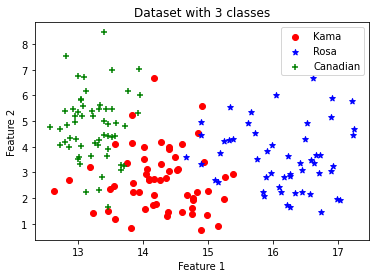

In [31]:
# Train Data
plotData(X_train, y_train, cls, class_names)

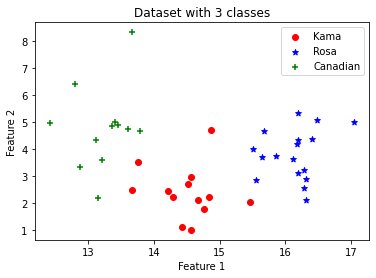

In [32]:
# Test Data
plotData(X_test_all, y_test_all, cls, class_names)

## Binary Classification

  - drop class 1 to work with 2 classes only

In [33]:
# Make copy from our main datasets
seeds_train_binary = seeds_train.copy()
seeds_test_binary = seeds_test.copy()

# Drop class = 1 from datasets to make it binary classification
df_train_filtered = seeds_train_binary[seeds_train_binary[2] > 1]
df_test_filtered = seeds_test_binary[seeds_test_binary[2] > 1]

# Split the train dataset to train and test
X_train = df_train_filtered.iloc[:, :2]
y_train = df_train_filtered.iloc[:, 2]

# Split the test dataset to train and test
X_test = df_test_filtered.iloc[:, :2]
y_test = df_test_filtered.iloc[:, 2]

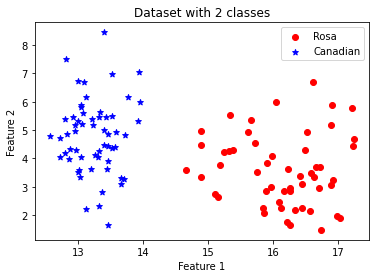

In [34]:
features, labels, cls= X_train.to_numpy(), y_train.to_numpy(), [2, 3]
X, y, cls_new = prepareDataset(features, labels, cls_remove=None)
class_names = getClassNames(c_names)

plotData(X, y, cls, class_names)

## SVM Model OVO

Accuracy of SVM model: 100.00%
 

Confusion Matrix:

[[17  0]
 [ 0 12]]


,y_test,y_pred
1,2,2
2,2,2
5,2,2
6,3,3
7,2,2


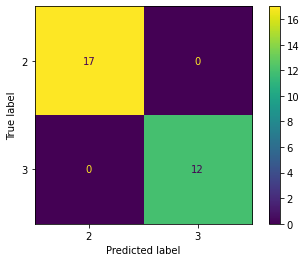

In [35]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

y_pred_svm_ovo = svm_model.predict(X_test)

print('Accuracy of SVM model: {:.2f}%'.format(getAccuracy(svm_model, X_test, y_test)))
print(" ")
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred_svm_ovo))
plot_confusion_matrix(svm_model, X_test, y_test, xticks_rotation='horizontal')

df_pred_SVM_OVO = pd.DataFrame()
df_pred_SVM_OVO['y_test'], df_pred_SVM_OVO['y_pred'] = y_test, y_pred_svm_ovo
# Split the train dataset to train and test
X_train = df_train_filtered.iloc[:, :2]
y_train = df_train_filtered.iloc[:, 2]

# Split the test dataset to train and test
X_test = df_test_filtered.iloc[:, :2]
y_test = df_test_filtered.iloc[:, 2]
df_pred_SVM_OVO.head()

In [36]:
X_test_ovo = X_test.to_numpy()
y_test_ovo = y_test.to_numpy()

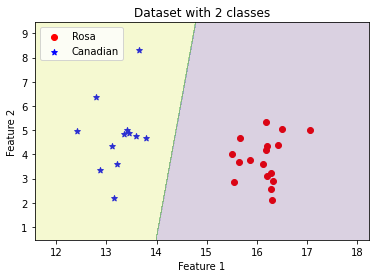

In [37]:
features, labels, cls= X_train.to_numpy(), y_train.to_numpy(), [2, 3]
X, y, cls_new = prepareDataset(features, labels, cls_remove=None)
class_names = getClassNames(c_names)

plotData(X_test_ovo, y_test_ovo, cls, class_names)
plotRegions(svm_model, X)
plt.legend(loc="upper left")
plt.show()

## Preceptron Model OVO

Accuracy of Preceptron model: 82.76%

Confusion Matrix:

[[17  0]
 [ 5  7]]


,y_test,y_red
1,2,2
2,2,2
5,2,2
6,3,2
7,2,2


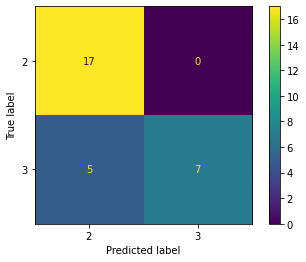

In [38]:
from sklearn.linear_model import Perceptron

preceptron_model = Perceptron(alpha = 0.01, tol=1e-2, random_state=0)
preceptron_model.fit(X_train, y_train)

y_pred_preceptron_ovo = preceptron_model.predict(X_test)

print('Accuracy of Preceptron model: {:.2f}%'.format(getAccuracy(preceptron_model, X_test, y_test)))

print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred_preceptron_ovo))
plot_confusion_matrix(preceptron_model, X_test, y_test, xticks_rotation='horizontal')

df_pred_Preceptron_OVO = pd.DataFrame()
df_pred_Preceptron_OVO['y_test'], df_pred_Preceptron_OVO['y_red'] = y_test, y_pred_preceptron_ovo
df_pred_Preceptron_OVO.head()

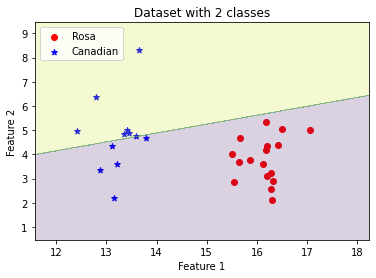

In [39]:
plotData(X_test_ovo, y_test_ovo, cls, class_names)
plotRegions(preceptron_model, X)
plt.legend(loc="upper left")
plt.show()

# Make Data Binary

In [40]:
# Make copy from our main datasets
seeds_train_ovr = seeds_train.copy()
seeds_test_ovr = seeds_test.copy()

In [42]:
# method to make data binary
def binary_y(df_train, df_test):
  for i in df_train[2].unique():
    df_train['y{}'.format(i)] = df_train[2].apply(lambda x: 1 if x == i else 0)
    df_test['y{}'.format(i)] = df_test[2].apply(lambda x: 1 if x == i else 0)

  return df_train, df_test

df_train_ovr, df_test_ovr = binary_y(seeds_train_ovr, seeds_test_ovr)
df_train_ovr

,0,1,2,y1,y2,y3
0,14.84,2.221,1,1,0,0
1,14.09,2.699,1,1,0,0
2,13.94,2.259,1,1,0,0
3,14.99,1.355,1,1,0,0
4,14.49,3.586,1,1,0,0
...,...,...,...,...,...,...
164,13.41,8.456,3,0,0,1
165,13.47,3.919,3,0,0,1
166,13.20,3.631,3,0,0,1
167,12.88,4.325,3,0,0,1


# SVM One V Rest

In [47]:
def Model_SVM(df_train_ovr, df_test_ovr):
    tmp = []
    svm_models = []
    for i in range(3):
        x_train = df_train_ovr.iloc[:, 0:2].to_numpy()
        y_train = df_train_ovr.iloc[:, (i+3)].to_numpy()

        x_test = df_test_ovr.iloc[:, 0:2].to_numpy()
        y_test = df_test_ovr.iloc[:, (i+3)].to_numpy()
        
        svm_model = svm.SVC(kernel='linear', decision_function_shape='ovo', probability=True)
        svm_model = svm_model.fit(x_train, y_train)
        
        svm_models.append(svm_model)
        
        svm_pred = svm_model.predict(x_test)

        print('Accuracy of SVM model: {:.2f}'.format(getAccuracy(svm_model, x_test, y_test)))
        print(" ")
        print('\nConfusion Matrix:\n')
        print(confusion_matrix(y_test, svm_pred))
        
        print('\nClassification Report:\n')
        print(classification_report(y_test, svm_pred))
        
        plot_confusion_matrix(svm_model, x_test, y_test, xticks_rotation='horizontal')
    
        tmp.append(svm_model.predict_proba(x_test))
        t = svm_model.predict_proba(x_test)
    return tmp, svm_models    

Accuracy of SVM model: 88.10
 

Confusion Matrix:

[[27  2]
 [ 3 10]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.83      0.77      0.80        13

    accuracy                           0.88        42
   macro avg       0.87      0.85      0.86        42
weighted avg       0.88      0.88      0.88        42

Accuracy of SVM model: 97.62
 

Confusion Matrix:

[[24  1]
 [ 0 17]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.94      1.00      0.97        17

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

Accuracy of SVM model: 100.00
 

Confusion Matrix:

[[30  0]
 [ 0 12]]

Classification Report:

              precision    recall  f1-score   support

     

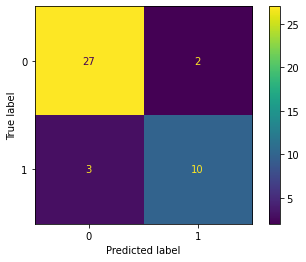

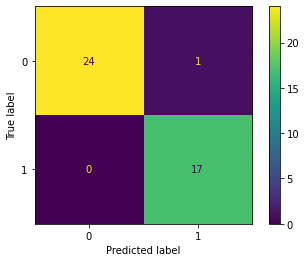

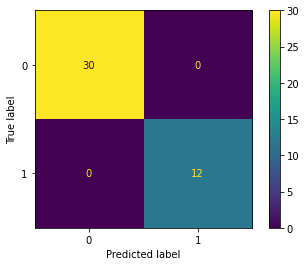

In [48]:
fl, svm_models = Model_SVM(df_train_ovr, df_test_ovr)
ls_svm_1 = fl[0][:,1]
ls_svm_2 = fl[1][:,1]
ls_svm_3 = fl[2][:,1]

In [50]:
# method to calculate final accuarcy
def get_final_acc(act, pred):
    correct = []
    errors = []
    for i in zip(act, pred):
        if(i[1] == i[0]):
            correct.append(i)
        else:
            errors.append(i)
    acc = len(correct)/len(act)        
    return correct, errors, acc 

In [51]:
predictions_svm =[]
for i in zip(ls_svm_1, ls_svm_2, ls_svm_3):
    x = np.argmax((i))
    predictions_svm.append(x+1)
print(predictions_svm) 

actuals = seeds_test.iloc[: , 2]

print('\nConfusion Matrix:\n')
print(confusion_matrix(actuals, predictions_svm))

correct, errors, accuracy = get_final_acc(actuals, predictions_svm)
print(" ")
print("Final Accuracy: ", accuracy)

[1, 2, 2, 1, 1, 2, 1, 2, 3, 3, 2, 3, 1, 3, 2, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 1, 2, 2]

Confusion Matrix:

[[11  2  0]
 [ 0 17  0]
 [ 1  0 11]]
 
Final Accuracy:  0.9285714285714286


#### Method to plot 3 models on test data 

In [30]:
def plot_regions_ovr(df_train_ovr, df_test_ovr, svm_models):
    
    for i in range(3):
        x_train = df_train_ovr.iloc[:, 0:2].to_numpy()
        y_train = df_train_ovr.iloc[:, (i+3)].to_numpy()

        x_test = df_test_ovr.iloc[:, 0:2].to_numpy()
        y_test = df_test_ovr.iloc[:, (i+3)].to_numpy()
        
        p_names = ['1','0']
        features, labels, cls_p = x_train, y_train, [1, 0]
        X, y, cls_new = prepareDataset(features, labels, cls_remove=None)

        plotData(x_test, y_test, cls_p, p_names)
        plotRegions(svm_models[i], X)
        plt.legend(loc= "upper left")
        plt.show()

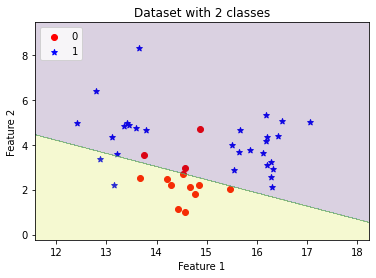

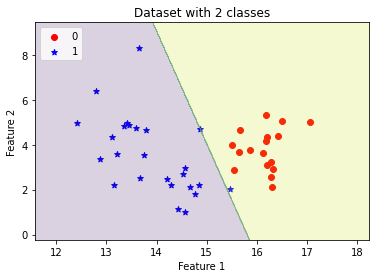

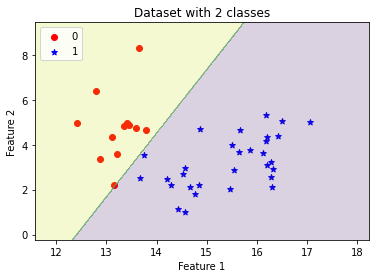

In [31]:
plot_regions_ovr(df_train_ovr, df_test_ovr, svm_models)

### Plot SVM models on test data 

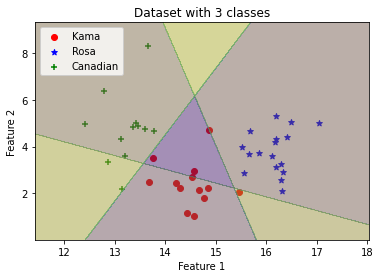

In [32]:
cls_final = [1, 2, 3]
class_names_final = getClassNames(c_names)

plotData(X_test_all, y_test_all, cls_final, class_names_final)
plotRegions(svm_models[0], X_test_all)
plotRegions(svm_models[1], X_test_all)
plotRegions(svm_models[2], X_test_all)
plt.legend(loc= "upper left")
plt.show()

# Preceptron One V Rest

In [33]:
def Model_Perceptron(df_train_ovr, df_test_ovr):
    tmp = []
    prec_models = []
    
    for i in range(3):
        x_train = df_train_ovr.iloc[:, 0:2].to_numpy()
        y_train = df_train_ovr.iloc[:, (i+3)].to_numpy()

        x_test = df_test_ovr.iloc[:, 0:2].to_numpy()
        y_test = df_test_ovr.iloc[:, (i+3)].to_numpy()
        
        preceptron_model = Perceptron(alpha = 0.01, tol=1e-2, penalty= 'l2', max_iter = 4000, n_iter_no_change = 8, validation_fraction = 0.3, random_state=0)
        prec_model = CalibratedClassifierCV(preceptron_model, method='sigmoid')
        prec_model_fitted = prec_model.fit(x_train, y_train)
        
        prec_models.append(prec_model_fitted)
        
        prec_pred = prec_model_fitted.predict(x_test)

        print('Accuracy of Preceptron model {}: {:.2f}'.format((i+1),getAccuracy(prec_model_fitted, x_test, y_test)))
        print(" ")
        print('\nConfusion Matrix:\n')
        print(confusion_matrix(y_test, prec_pred))
        
        print('\nClassification Report:\n')
        print(classification_report(y_test, prec_pred))
        
        plot_confusion_matrix(prec_model_fitted, x_test, y_test, xticks_rotation='horizontal')
    
        
        tmp.append(prec_model_fitted.predict_proba(x_test))
    
    return tmp, prec_models  

Accuracy of Preceptron model 1: 83.33
 

Confusion Matrix:

[[25  4]
 [ 3 10]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.71      0.77      0.74        13

    accuracy                           0.83        42
   macro avg       0.80      0.82      0.81        42
weighted avg       0.84      0.83      0.83        42

Accuracy of Preceptron model 2: 97.62
 

Confusion Matrix:

[[24  1]
 [ 0 17]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.94      1.00      0.97        17

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

Accuracy of Preceptron model 3: 92.86
 

Confusion Matrix:

[[30  0]
 [ 3  9]]

Classification Report:

              precision    recall 

/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/shehata/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of 

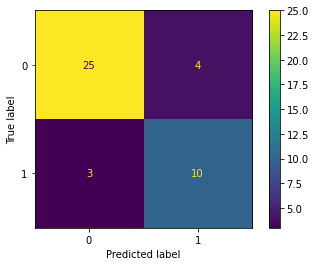

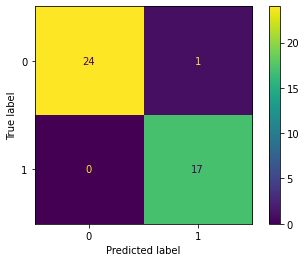

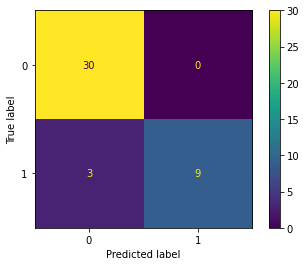

In [34]:
fl_pre, precptron_models = Model_Perceptron(df_train_ovr, df_test_ovr)
ls_pre_1 = fl_pre[0][:,1]
ls_pre_2 = fl_pre[1][:,1]
ls_pre_3 = fl_pre[2][:,1]

# Recently Added 

In [35]:
predictions_prec =[]
for i in zip(ls_pre_1, ls_pre_2, ls_pre_3):
    x = np.argmax((i))
    #print(i)
    predictions_prec.append(x+1)
print(predictions_prec) 
print('\nConfusion Matrix:\n')
print(confusion_matrix(actuals, predictions_prec))

correct_prec, errors_prec, accuracy_prec = get_final_acc(actuals, predictions_prec)
print(" ")
print("Final Accuracy: ", accuracy_prec)

[1, 2, 2, 1, 1, 2, 1, 2, 3, 3, 2, 3, 1, 3, 2, 2, 2, 1, 3, 1, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 1, 2, 2]

Confusion Matrix:

[[11  1  1]
 [ 0 17  0]
 [ 1  0 11]]
 
Final Accuracy:  0.9285714285714286


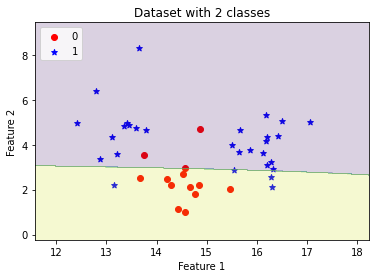

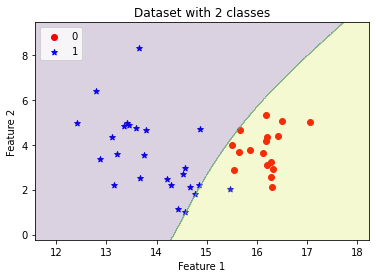

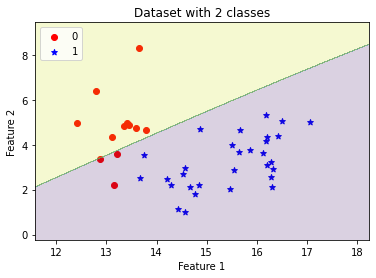

In [36]:
plot_regions_ovr(df_train_ovr, df_test_ovr, precptron_models)

### Plot Preceptron Model on test data

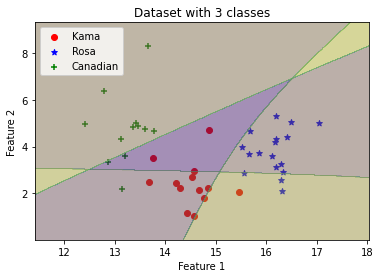

In [37]:
cls_final = [1, 2, 3]
class_names_final = getClassNames(c_names)

plotData(X_test_all, y_test_all, cls_final, class_names_final)
plotRegions(precptron_models[0], X_test_all)
plotRegions(precptron_models[1], X_test_all)
plotRegions(precptron_models[2], X_test_all)
plt.legend(loc= "upper left")
plt.show()

# Plot True Label Predicition and Wrong Label Predicition

In [38]:
pred_df = pd.DataFrame()
pred_df['X_1'] = seeds_test.iloc[:, 0]
pred_df['X_2'] = seeds_test.iloc[:, 1]
pred_df['Actual_y'] = seeds_test.iloc[:, 2]
pred_df['svm_Pred_y'] =  predictions_svm
pred_df['prec_pred_y'] = predictions_prec
# pred_df

In [39]:
features_x = pred_df.iloc[:, 0:2].to_numpy()
actual_y = pred_df.Actual_y.to_numpy()
svm_pred_y = pred_df.svm_Pred_y.to_numpy()
preceptron_pred_y = pred_df.prec_pred_y.to_numpy()

In [40]:
def true_y(features_x, actual_y, pred_y):
    feat_true = []
    act_y = []
    
    for i in range(len(actual_y)):
        if (actual_y[i] == pred_y[i]):
            feat_true.append(features_x[i])
            act_y.append(actual_y[i])
        else:
            feat_true.append(features_x[i])
            act_y.append(4)
            
    true_y_df = pd.DataFrame(feat_true)
    true_y_df['final_y'] = act_y  
    
    return true_y_df

In [41]:
svm_final_y_df = true_y(features_x, actual_y, svm_pred_y)
preceptron_final_y_df = true_y(features_x, actual_y, preceptron_pred_y)

In [42]:
def plotDataBinary(features, labels, cls, class_names):
  colors = ['r', 'b', 'g','y']
  markers = ['o', '*', '+', 'X']
  for class_index in range(len(cls)):
    plt.scatter(features[labels == cls[class_index],0],
                features[labels == cls[class_index],1],
                c=colors[class_index], marker=markers[class_index],
                label=class_names[cls[class_index]])
  Title = "Dataset with {n} classes".format(n= int(len(cls)))
  plt.title(Title)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()

In [43]:
def final_plot_4_labels(final_y_df):
    cls_p = [1, 2, 3, 4]
    p_names = ['Kama','Rosa','Canadian','False']

    features_test = final_y_df.iloc[:, 0:2].to_numpy()
    labels_test = final_y_df.iloc[:, 2].to_numpy()
    class_names_4 = getClassNames(p_names)

    plotDataBinary(features_test, labels_test, cls_p, class_names_4)
    plt.legend(loc="upper left")
    plt.show()

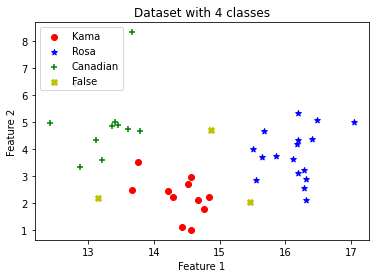

In [44]:
final_plot_4_labels(svm_final_y_df)

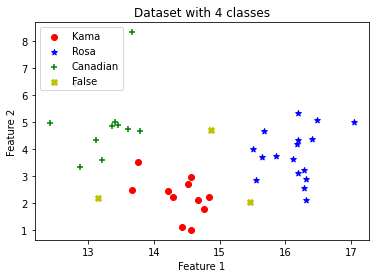

In [45]:
final_plot_4_labels(preceptron_final_y_df)

# Our Stratigy

In [46]:
##################### Instead of argmax ######################## Same accuracy!
def our_stratigy(ls1, ls2, ls3):
    ls_predictions = []
    for x, y, z in zip(ls1, ls2, ls3):
        temp, num = x, 1
        if (y > x):
            temp = y
            num = 2
        if (z > temp):
            temp = z
            num = 3
        ls_predictions.append(num)        
    return ls_predictions

In [47]:
svm_predictions = our_stratigy(ls_svm_1, ls_svm_2, ls_svm_3)
preceptron_predictions = our_stratigy(ls_pre_1, ls_pre_2, ls_pre_3)

print("SVM PRedictions: \n", svm_predictions)
print(" ")
print("Preceptron Preictions: \n", preceptron_predictions)

SVM PRedictions: 
 [1, 2, 2, 1, 1, 2, 1, 2, 3, 3, 2, 3, 1, 3, 2, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 1, 2, 2]
 
Preceptron Preictions: 
 [1, 2, 2, 1, 1, 2, 1, 2, 3, 3, 2, 3, 1, 3, 2, 2, 2, 1, 3, 1, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 1, 2, 2]


In [48]:
####################################### Our Stratigy #########################################
ls_pre1 = fl_pre[0][:]
ls_pre2 = fl_pre[1][:]
ls_pre3 = fl_pre[2][:]

def ls_back(ls):
    l = []
    temp = 0
    for y, j in ls:
        if (j > y and j > .6):
            temp = 1
        elif (y > j and y > .6):
            temp = -1
        elif (j > .5):
            temp = .5
        elif (y > .5):
            temp = -.5
        else:
            temp = 0      
        l.append(temp)
    return l

l1 = ls_back(ls_pre1)
l2 = ls_back(ls_pre2)
l3 = ls_back(ls_pre3)

final = []
for x, y, z in zip(l1, l2, l3):
    if (y == 1):
        temp = 2
    elif (x == 1):
        temp = 1
    elif (z == 1):
        temp = 3
    elif (x == .5):
        temp = 1
    elif (y == .5):
        temp = 2
    elif (z == .5):
        temp = 3
    else:
        temp = 3
    final.append(temp)
print(final)

[1, 2, 2, 1, 3, 2, 1, 2, 3, 3, 2, 3, 1, 3, 2, 2, 2, 1, 3, 3, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 1, 2, 2]


In [49]:
print(final)
print('\nConfusion Matrix:\n')
print(confusion_matrix(actuals, final))
correct_prec, errors_prec, accuracy_prec = get_final_acc(actuals, final)
print(" ")
print("Final Accuracy: ", accuracy_prec)

[1, 2, 2, 1, 3, 2, 1, 2, 3, 3, 2, 3, 1, 3, 2, 2, 2, 1, 3, 3, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 1, 2, 2]

Confusion Matrix:

[[ 9  1  3]
 [ 0 17  0]
 [ 1  0 11]]
 
Final Accuracy:  0.8809523809523809
